In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from LR import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [352]:
data = pd.read_csv("C:/Users/oguzd/OneDrive/Masaüstü/YAP470/Ödevler/ÖDEV2/500_Person_Gender_Height_Weight_Index.csv")
data.drop(columns="Gender",inplace=True)
data

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


In [353]:
missing_values = data.isnull().sum()
print(missing_values)
data.dtypes

Height    0
Weight    0
Index     0
dtype: int64


Height    int64
Weight    int64
Index     int64
dtype: object

# EDA

In [354]:

data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


### Distributions of Features

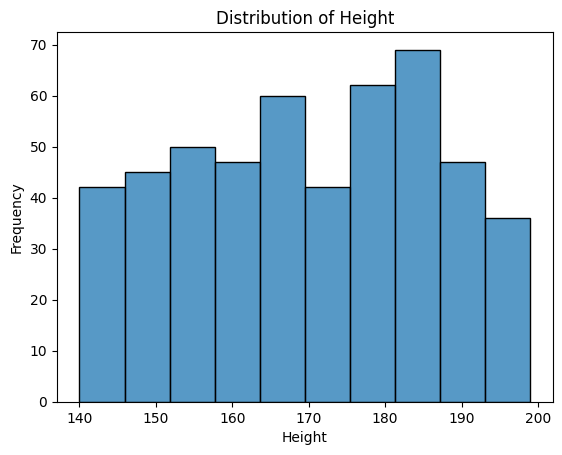

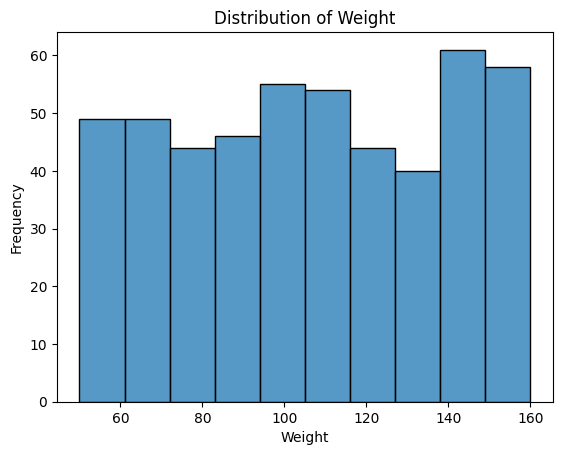

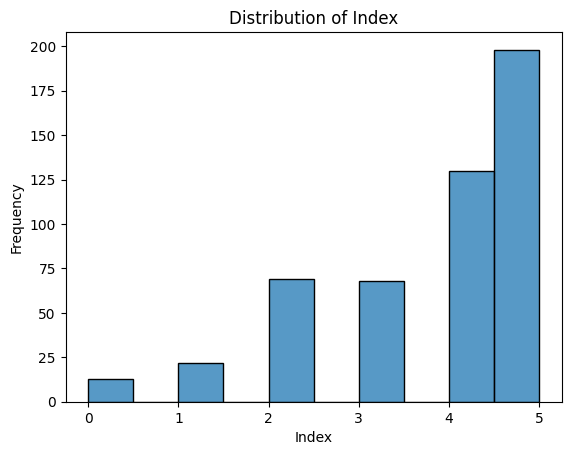

In [355]:
sns.histplot(data=data, x='Height')
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=data, x='Weight')
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=data, x='Index')
plt.title('Distribution of Index')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.show()

## Height - Weight Distribution

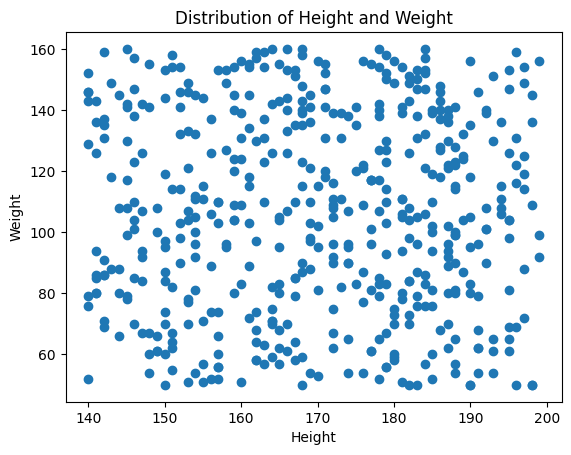

In [356]:
height = data['Height']
weight = data['Weight']

plt.scatter(height, weight)
plt.title('Distribution of Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Text(0.5, 0.92, 'Distribution of Columns in 3D Space')

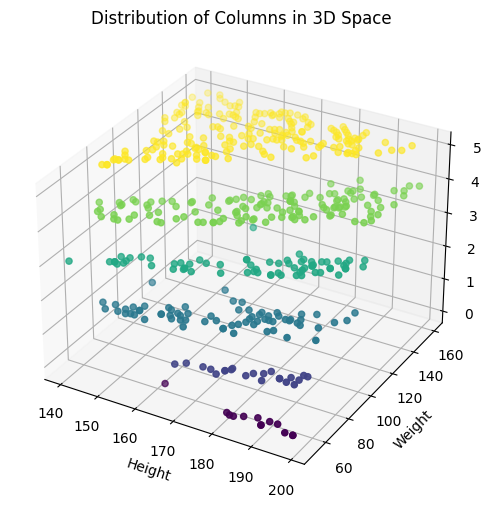

In [357]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = data['Height']
y = data['Weight']
z = data['Index']

ax.scatter(x, y, z, c=z, cmap='viridis')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Index')
ax.set_title('Distribution of Columns in 3D Space')

### Pairplots to examine the Index feature's distribution

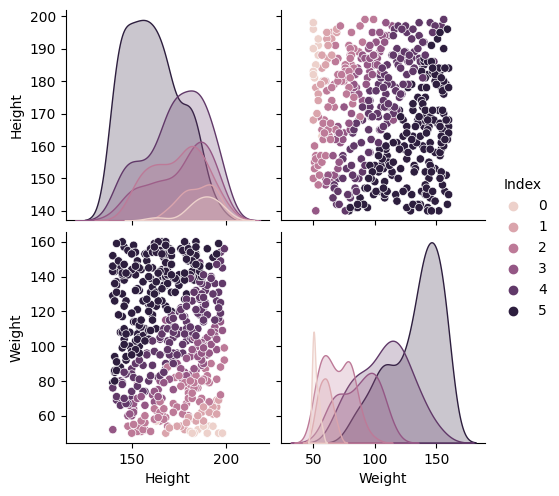

In [358]:
sns.pairplot(data, hue="Index")
plt.show()

## Correlation Matrix

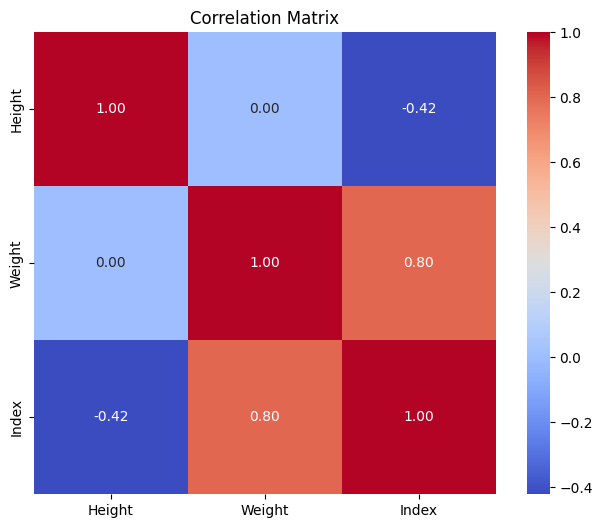

In [359]:
numeric_columns = ['Height', 'Weight', 'Index']
numeric_data = data[numeric_columns]

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

## Box Plots

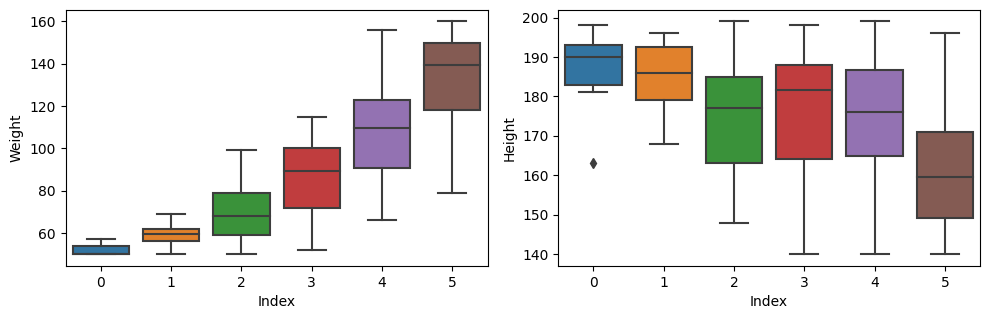

In [360]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="Index", y="Weight", data=data)
plt.subplot(2, 2, 2)
sns.boxplot(x="Index", y="Height", data=data)
plt.tight_layout()
plt.show()

# Train The Model

In [361]:
model = LinearRegression(learning_rate=0.000005, epoch=1000)


features = data
features = features.drop('Index', axis=1)
features = features.values.tolist()


target_list = data['Index'].tolist()

features = data.drop('Index', axis=1).values.tolist()
y=pd.Series(target_list)
features = pd.Series(features)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.5, shuffle=True)

X_train_list=X_train.values.tolist()

X_test_list=X_test.values.tolist()


z_train=y_train.values.tolist()

z_test=y_test.values.tolist()


heights_train  = [sublist[0] for sublist in X_train_list]

weights_train = [sublist[1] for sublist in X_train_list]

print(model.m1)
print(model.m2)
print(model.b)

model.fit(heights_train,weights_train,z_train)

print(model.m1)
print(model.m2)
print(model.b)


1
2
0
-0.002971025041964418
0.03941462138315578
-0.006501301699727089


## Training Loss Function

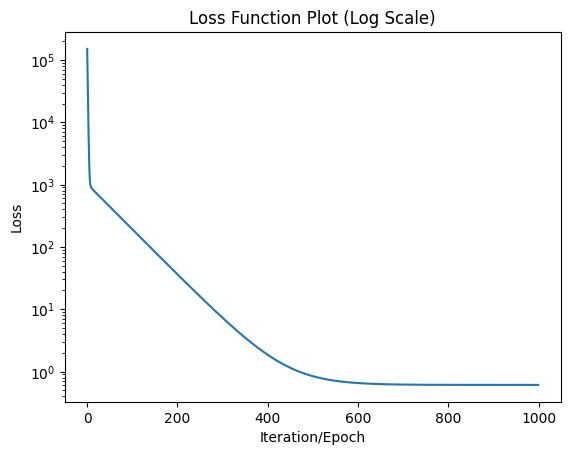

In [362]:
loss_values = model.loss_values

plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Iteration/Epoch')
plt.ylabel('Loss')
plt.yscale('log')  
plt.title('Loss Function Plot (Log Scale)')
plt.show()

# Make Predictions

In [363]:
predictions = model.predict(X_test_list, z_test)
actuals = z_test
print(predictions)
print(actuals)

[1.423503209820538, 1.4658888562456582, 2.9234385515848036, 4.781076510839435, 2.5635562048900913, 5.208098158441111, 2.9458183185537914, 5.568577642664932, 1.9551078714200774, 2.6275303224465807, 4.971416271833668, 2.9612705812927227, 3.335410915668148, 2.0266066307357327, 5.8125900127230326, 5.396855327760106, 3.949801299222091, 2.763600336847835, 2.970377814727125, 4.480017527454902, 2.1210822945494843, 5.089062998454025, 3.5867537691769047, 2.19238689555663, 5.61254588076529, 2.1670361035456787, 2.446700774107352, 4.851783974317472, 4.407727472301628, 5.120355840548906, 4.982703234472416, 4.021105900229236, 3.6738989495400003, 4.662041350852349, 4.260564653570135, 2.183473820430737, 4.686600847025684, 5.210875025174566, 3.251430918655526, 2.6742754272803926, 2.4645269243591383, 3.7176730293318485, 5.444585886740046, 2.578411330099913, 3.901473602713042, 5.1805676372258125, 3.1733929717268325, 3.7562963548773856, 1.8198291528564419, 3.7921428136894675, 5.332089914365998, 4.357220046

# Results

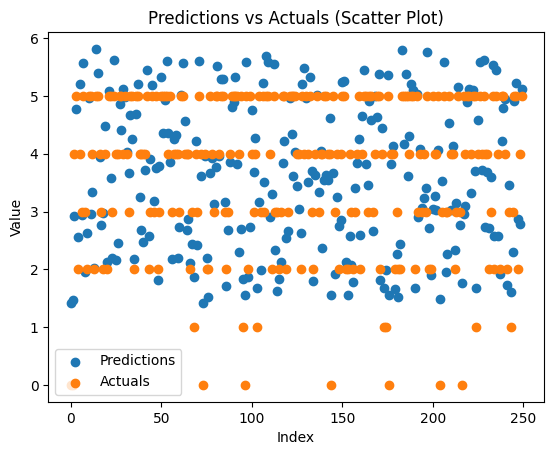

In [364]:
indices = range(len(predictions))
plt.scatter(indices, predictions, label='Predictions')
plt.scatter(indices, actuals, label='Actuals')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predictions vs Actuals (Scatter Plot)')
plt.legend()
plt.show()

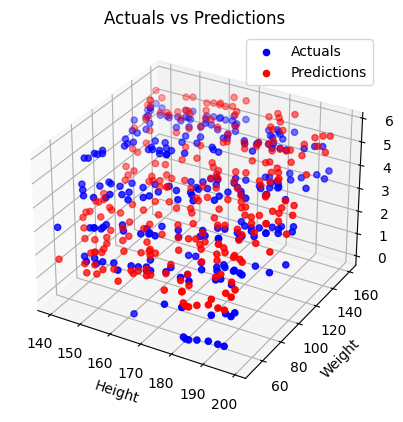

In [365]:
heights = [sublist[0] for sublist in X_test_list]

weights= [sublist[1] for sublist in X_test_list]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(heights, weights, actuals, c='b', label='Actuals')

ax.scatter(heights, weights, predictions, c='r', label='Predictions')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Value')

ax.set_title('Actuals vs Predictions')

plt.legend()
plt.show()

In [366]:
mse_test = mean_squared_error(actuals, predictions)
print(mse_test)

0.659418785695934


## Supplementary Mertics

In [367]:
mae_test = mean_absolute_error(actuals, predictions)
mae_test

0.6429685742731979

In [368]:
r2_test = r2_score(actuals, predictions)
r2_test

0.6330560729905278

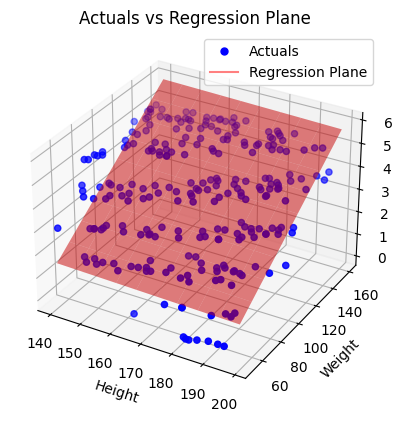

In [369]:
m1 = model.m1
m2 = model.m2
b = model.b

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(heights, weights, actuals, c='b', label='Actuals')

line_heights = np.linspace(min(heights), max(heights), 10)
line_weights = np.linspace(min(weights), max(weights), 10)
line_heights, line_weights = np.meshgrid(line_heights, line_weights)
line_actuals = m1 * line_heights + m2 * line_weights + b


ax.plot_surface(line_heights, line_weights, line_actuals, color='r', alpha=0.5, label='Regression Plane')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Value')

ax.set_title('Actuals vs Regression Plane')


actuals_patch = plt.Line2D([], [], linestyle='', marker='o', markersize=5, color='b', label='Actuals')
line_patch = plt.Line2D([], [], linestyle='-', color='r', alpha=0.5, label='Regression Plane')
plt.legend(handles=[actuals_patch, line_patch])

plt.show()

[1.0131806941846873, 1.0437978818086446, 0.8890293465747341, 0.67276294669433, 0.5699699169624763, 0.5966000275044637, 0.5115811417612789, 0.4678385325247697, 0.47651200448692205, 0.44855051931772527, 0.4078103370850178, 0.547010210773871, 0.5219201426763829, 0.48466541508518074, 0.47436447170540935, 0.4496383844479332, 0.4232631827027545, 0.4013009170175586, 0.4049596346301763, 0.3904720735652655, 0.37222723487295206, 0.35548809278085475, 0.3834508911150716, 0.3810620816200407, 0.37332384747608954, 0.42357594268287474, 0.45256828712348496, 0.43679741955245205, 0.4277834869310954, 0.434443990857593, 0.4204344940250532, 0.40730287638402785, 0.4018412709510439, 0.39170205781327355, 0.3883214937550351, 0.37800232230049874, 0.36911332749622877, 0.3599849277758329, 0.3579385920577976, 0.37095944779025997, 0.39066382181998544, 0.3823112131857793, 0.3757185874220221, 0.37098134301229374, 0.3717668093496698, 0.36403932079438694, 0.3566136450609346, 0.365296681173116, 0.3581728870079547, 0.3572

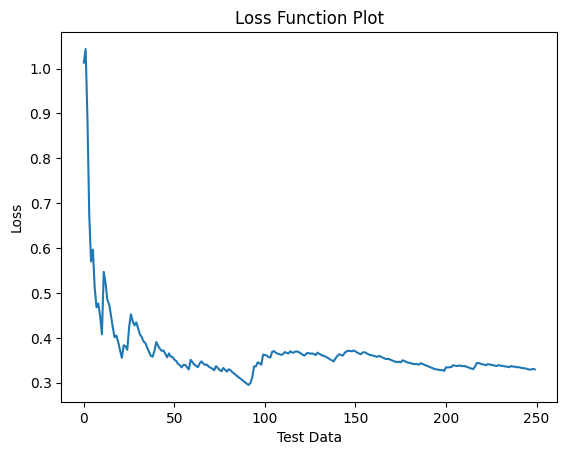

In [370]:
loss_values_test = model.loss_values_test
print(loss_values_test)

plt.plot(range(len(loss_values_test)), loss_values_test)
plt.xlabel('Test Data')
plt.ylabel('Loss') 
plt.title('Loss Function Plot')
plt.show()

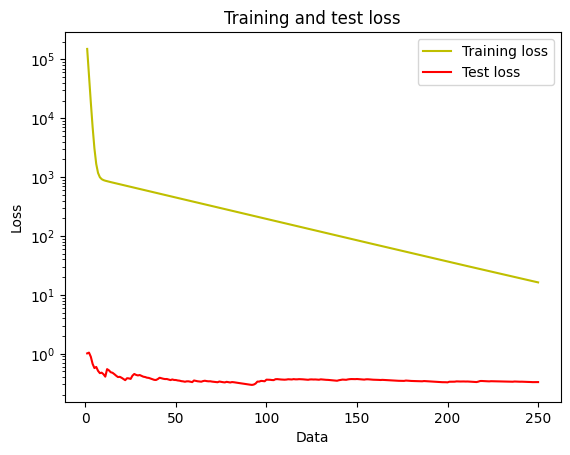

In [371]:
cut = len(model.loss_values_test)

train_loss = model.loss_values[:cut]
test_loss = model.loss_values_test

epochs = range(1, len(model.loss_values_test) + 1)
plt.plot(epochs, train_loss, 'y', label='Training loss')
plt.plot(epochs, test_loss , 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Data')
plt.ylabel('Loss')
plt.yscale('log') 
plt.legend()
plt.show()

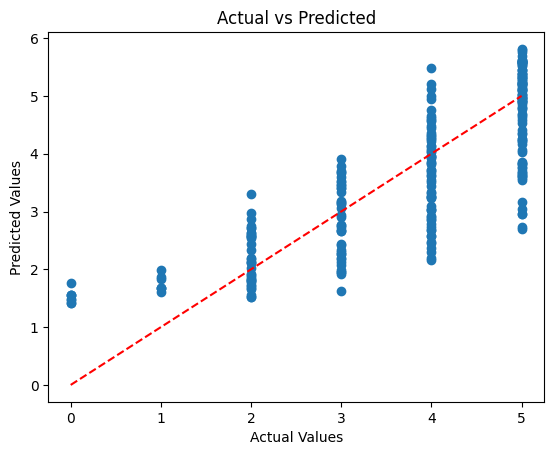

In [372]:
plt.scatter(actuals, predictions)
plt.plot([min(actuals), max(z_test)], [min(z_test), max(z_test)], color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

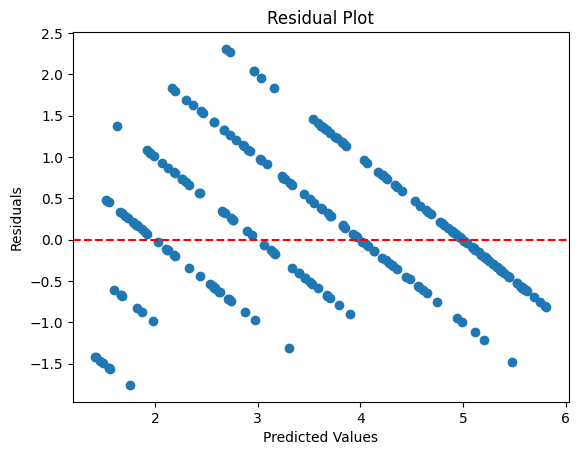

In [373]:
actuals_arr = np.array(actuals)
predictions_arr = np.array(predictions)
residuals = actuals_arr - predictions_arr

plt.scatter(predictions_arr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

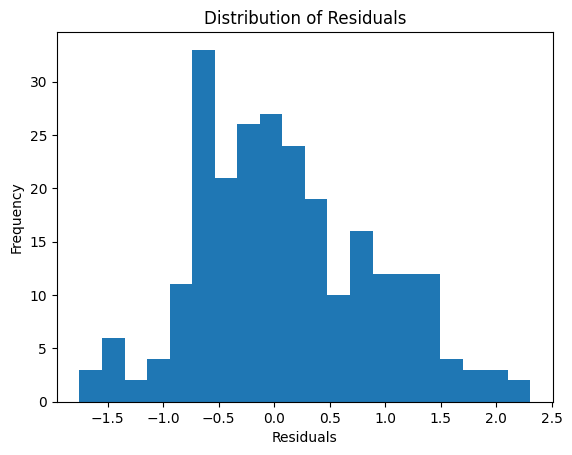

In [374]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

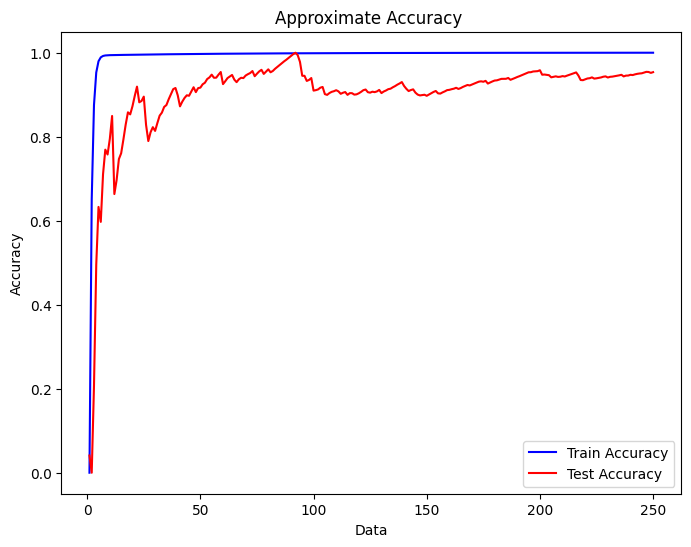

In [375]:
scaled_train_losses = [(loss - min(train_loss)) / (max(train_loss) - min(train_loss)) for loss in train_loss]
scaled_test_losses = [(loss - min(test_loss)) / (max(test_loss) - min(test_loss)) for loss in test_loss]


train_accuracy_values = [1.0 - loss for loss in scaled_train_losses]
test_accuracy_values = [1.0 - loss for loss in scaled_test_losses]

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy_values, label='Train Accuracy', color='blue')
plt.plot(epochs, test_accuracy_values, label='Test Accuracy', color='red')
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Approximate Accuracy ')
plt.legend()
plt.show()

### In my model, during the update of iterative values m1, m2, and b, I observed that my training error converged to 0 around the 400th epoch (I measure it in my LR class). Alongside this, I measured my test error (test loss) by calculating the average change in my LR implementation and used the RMSE approach. Through this measurement, which I repeated as test data arrived, I observed that the error approached around 0.32. For accuracy measurement, I normalized these error values (both train loss and test loss) in the range of 0-1. As expected, while the training error converged to 0, its accuracy also converged to 1.0. For the test, there was a more fluctuating pattern, but an improvement in its accuracy can also be observed.